In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from CZAR import *

In [2]:
H_in_kJmol = 2625.499639 # Hartree/kJmol
H_in_J  = 4.359744e-18
bohr2angs = 0.52917721092e0
kB      = 1.380648e-23      # J / K
H_to_u   = 2.921264912428e-8  # Hartree to mass unit
fs_to_au = 41.341374575751    # a.u. per fs
kB_a = kB / H_in_J
T = 300.0

In [3]:
def f1(x,y):
    a = 1.4e-6 
    b = 0.5    
    d = 20.0   
    return a * (x-d)*(x-d)*(x+d)*(x+d) + b * y*y

In [4]:
def f2(x,y):
    a = 1.4e-6 
    b = 0.5   
    c = 5.0e-5 
    d = 20.0   
    s1 = (x-d)*(x-d)
    s2 = (x+d)*(x+d)
    return a * s1*s2 + y*y * (b + c * s1*s2)

In [5]:
def f3(x,y):
    a = 0.005
    b = 0.040
    d = 20.0 / bohr2angs
    e = 10.0 / bohr2angs
    exp_1 = np.exp((-a*(x-d)*(x-d)) + (-b*(y-e)*(y-e)))
    exp_2 = np.exp((-a*(x+d)*(x+d)) + (-b*(y+e)*(y+e)))
    return - np.log10(exp_1 + exp_2)

In [6]:
x1 = np.linspace(-40, 40, 80)
y1 = np.linspace(-4, 4, 40)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f1(X1,Y1)
x2 = np.linspace(-40, 40, 80)
y2 = np.linspace(-4, 4, 40)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = f2(X2,Y2)
x3 = np.linspace(-40, 40, 80)
y3 = np.linspace(-20, 20, 80)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = f3(X3,Y3)

0.22399999999999998

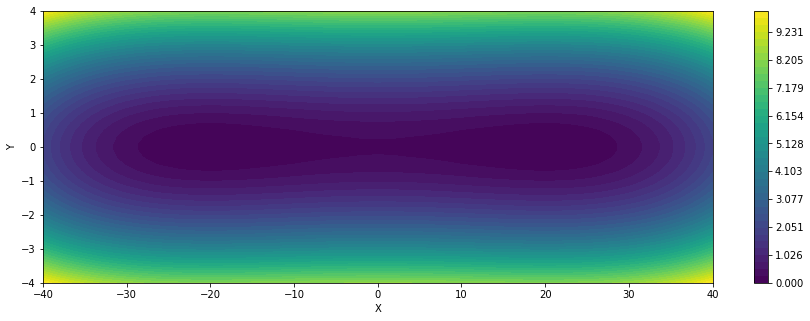

In [7]:
fig, ax1 = plt.subplots(figsize=(15,5))
levels = np.linspace(0,10,40)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
cs = ax1.contourf(X1,Y1,Z1,levels = levels)
fig.colorbar(cs)
f1(0,0)

0.22399999999999998

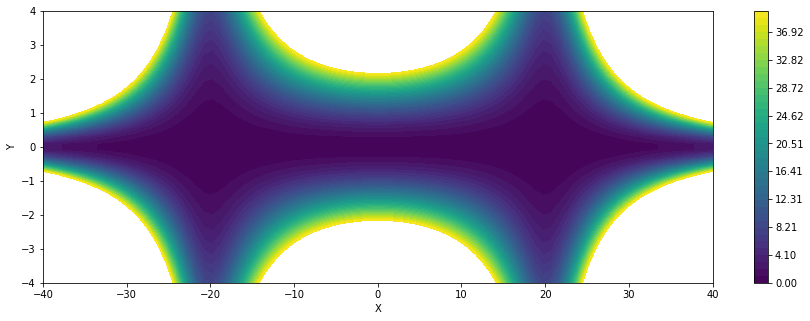

In [8]:
fig, ax1 = plt.subplots(figsize=(15,5))
levels = np.linspace(0,40,40)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
cs = ax1.contourf(X2,Y2,Z2,levels=levels)
fig.colorbar(cs)
f2(0,0)

9.004332494684398

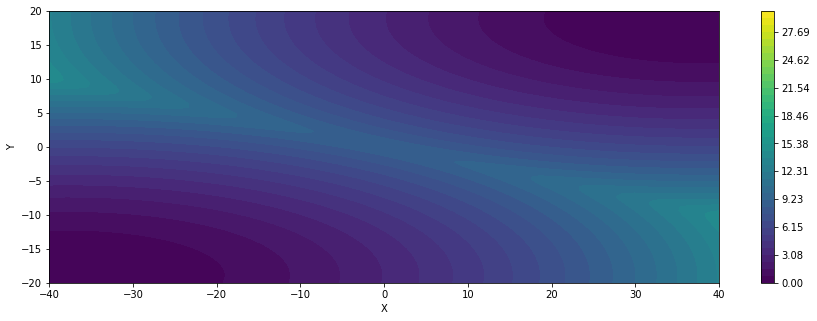

In [9]:
fig, ax1 = plt.subplots(figsize=(15,5))
levels = np.linspace(0,30,40)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
cs = ax1.contourf(X3,Y3,Z3,levels=levels)
fig.colorbar(cs)
f3(0,0)

In [10]:
ref1 = pd.read_csv('p1_reference.txt', sep='\t')
ref1.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [11]:
ref2 = pd.read_csv('p2_reference.txt', sep='\t')
ref2.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [12]:
ref3 = pd.read_csv('p3_reference.txt', sep='\t')
ref3.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [13]:
dx = 1
xmin = int(ref1['X'].min())
xmax = int(ref1['X'].max())
Nbins = int((xmax-xmin)/dx)

In [14]:
dy = 1
ymin = int(ref3['Y'].min())
ymax = int(ref3['Y'].max())
Nbinsy = int((ymax-ymin)/dy)

In [15]:
hist1 = np.zeros(Nbins)
x1 = np.zeros(Nbins)
for i in range(Nbins):
    x1[i] = xmin+i*dx+dx/2
    b = ref1[ref1['X'].between(xmin+i*dx,xmin+i*dx+dx)]
    hist1[i] = len(b)

In [16]:
hist2 = np.zeros(Nbins)
x2 = np.zeros(Nbins)
for i in range(Nbins):
    x2[i] = xmin+i*dx+dx/2
    b = ref2[ref2['X'].between(xmin+i*dx,xmin+i*dx+dx)]
    hist2[i] = len(b)

In [17]:
hist3x = np.zeros(Nbins)
x3 = np.zeros(Nbins)
for i in range(Nbins):
    x3[i] = xmin+i*dx+dx/2
    b = ref3[ref3['X'].between(xmin+i*dx,xmin+i*dx+dx)]
    hist3x[i] = len(b)

In [18]:
hist3y = np.zeros(Nbinsy)
y3 = np.zeros(Nbinsy)
for i in range(Nbinsy):
    y3[i] = ymin+i*dy+dy/2
    b = ref3[ref3['Y'].between(ymin+i*dy,ymin+i*dy+dy)]
    hist3y[i] = len(b)

In [19]:
dxy = 1
xymin = int((ref3['X']+ref3['Y']).min())
xymax = int((ref3['X']+ref3['Y']).max())
Nbinsxy = int((xymax-xymin)/dxy)

In [20]:
hist3xy = np.zeros(Nbinsxy)
xy3 = np.zeros(Nbinsxy)
ref3['XY'] = ref3['X'] + ref3['Y']
for i in range(Nbinsy):
    xy3[i] = xymin+i*dxy+dxy/2
    b = ref3[ref3['XY'].between(xymin+i*dxy,xymin+i*dxy+dxy)]
    hist3xy[i] = len(b)

In [21]:
abf1 = pd.read_csv('p1_abf.txt', sep='\t')
abf1.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [22]:
eabf1 = pd.read_csv('p1_eabf_sig0p5.txt', sep='\t')
eabf1.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

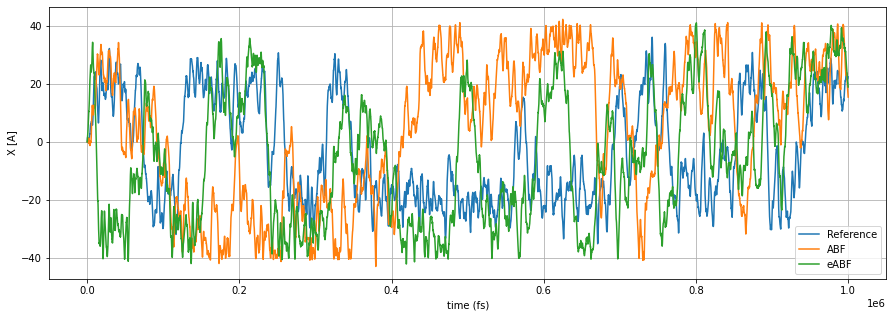

In [23]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(ref1['time'],ref1['X'],label='Reference')
ax1.plot(abf1['time'],abf1['X'], label='ABF')
ax1.plot(eabf1['time'],eabf1['X'], label='eABF')
ax1.set_xlabel('time (fs)')
ax1.set_ylabel('X [A]')
plt.legend()
plt.grid()

In [24]:
abf2 = pd.read_csv('p2_abf.txt', sep='\t')
abf2.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [25]:
eabf2 = pd.read_csv('p2_eabf_sig1.txt', sep='\t')
eabf2.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

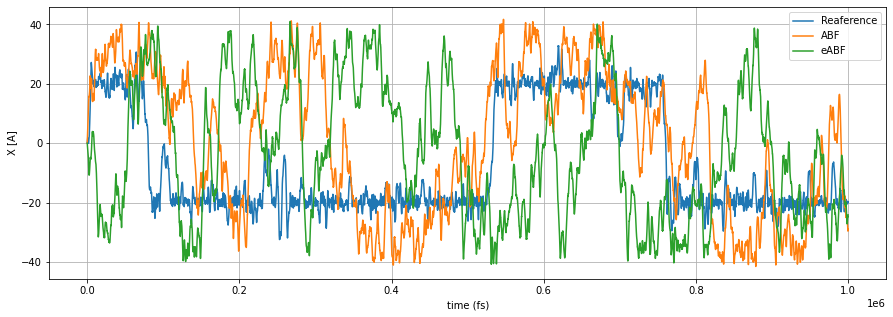

In [26]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(ref2['time'],ref2['X'],label='Reaference')
ax1.plot(abf2['time'],abf2['X'],label='ABF')
ax1.plot(eabf2['time'],eabf2['X'],label='eABF')
ax1.set_xlabel('time (fs)')
ax1.set_ylabel('X [A]')
plt.legend()
plt.grid()

In [27]:
abf3x = pd.read_csv('p3_abfx.txt', sep='\t')
abf3x.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [28]:
abf3y = pd.read_csv('p3_abfy.txt', sep='\t')
abf3y.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [29]:
abf3xy = pd.read_csv('p3_abfxy.txt', sep='\t')
abf3xy.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [30]:
abf3x4y = pd.read_csv('p3_abfx4y.txt', sep='\t')
abf3x4y.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

In [31]:
eabf3x4y = pd.read_csv('p3_eabfx4y_sig0p5.txt', sep='\t')
eabf3x4y.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

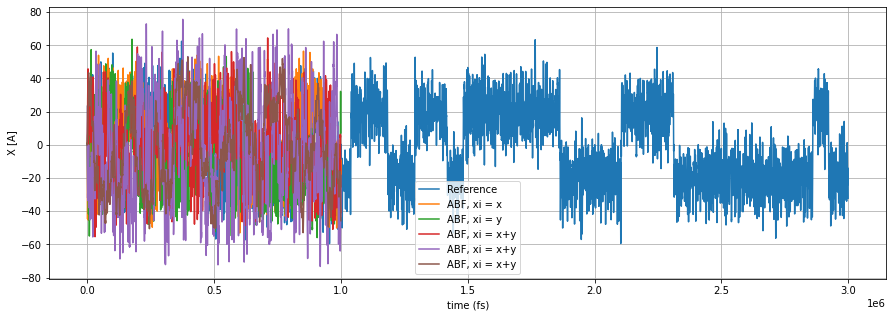

In [32]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(ref3['time'],ref3['X'],label='Reference')
ax1.plot(abf3x['time'],abf3x['X'],label='ABF, xi = x')
ax1.plot(abf3y['time'],abf3y['X'],label='ABF, xi = y')
ax1.plot(abf3xy['time'],abf3xy['X'],label='ABF, xi = x+y')
ax1.plot(abf3x4y['time'],abf3x4y['X'],label='ABF, xi = x+y')
ax1.plot(eabf3x4y['time'],eabf3x4y['X'],label='ABF, xi = x+y')

#ax1.plot(abf2_2D['time'],abf2_2D['X'],label='ABF 2D')
#ax1.plot(eabf2['time'],eabf2['X'],label='eABF')
ax1.set_xlabel('time (fs)')
ax1.set_ylabel('X [A]')
plt.legend()
plt.grid()

In [33]:
abf1_out = pd.DataFrame(dtype=np.float64)
abf1_out = pd.read_csv('p1_abf_out.txt',sep='\t')
abf1_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf1_out = ABF_estimator(abf1_out)

In [34]:
eabf1_out = pd.DataFrame(dtype=np.float64)
eabf1_out = pd.read_csv('p1_eabf_sig0p5_out.txt',sep='\t')
eabf1_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf1_traj = pd.DataFrame(dtype=np.float64)
eabf1_traj = pd.read_csv('p1_eabf_sig0p5_traj.dat',sep='\t')
eabf1_traj.columns = ['time','Xi0','eXi0','-']
eabf1_traj = eabf1_traj.drop(columns=["-"])
eabf1_out = ABF_estimator(eabf1_out)
czar1 = CZAR_estimator(eabf1_traj, -40, 40, 2.0, 1.0, 300)


	k =	      0.000950 Hartree/rad^2
	dx =	      2.000000
	minx =	    -40.000000
	maxx =	     40.000000
	nbins =	            40



In [35]:
abf2_out = pd.DataFrame(dtype=np.float64)
abf2_out = pd.read_csv('p2_abf_out.txt',sep='\t')
abf2_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf2_out = ABF_estimator(abf2_out)

In [36]:
eabf2_out = pd.DataFrame(dtype=np.float64)
eabf2_out = pd.read_csv('p2_eabf_sig1_out.txt',sep='\t')
eabf2_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf2_traj = pd.DataFrame(dtype=np.float64)
eabf2_traj = pd.read_csv('p2_eabf_sig1_traj.dat',sep='\t')
eabf2_traj.columns = ['time','Xi0','eXi0','-']
eabf2_traj = eabf2_traj.drop(columns=["-"])
eabf2_out = ABF_estimator(eabf2_out)
czar2 = CZAR_estimator(eabf2_traj, -40, 40, 2, 1.0, 300)


	k =	      0.000950 Hartree/rad^2
	dx =	      2.000000
	minx =	    -40.000000
	maxx =	     40.000000
	nbins =	            40



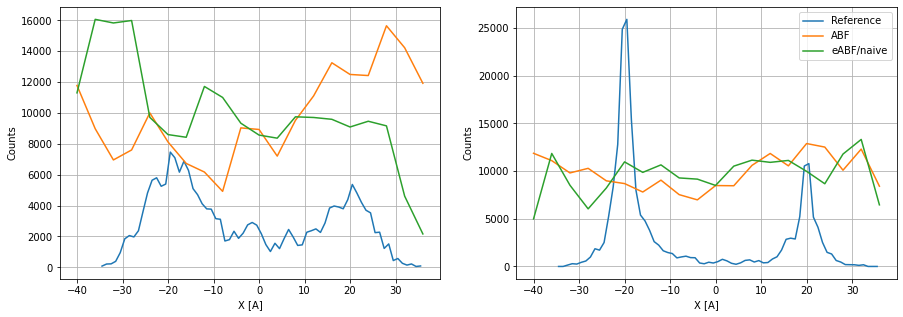

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.plot(x1,hist1, label='Reference')
ax2.plot(x2,hist2, label='Reference')
ax1.plot(abf1_out['Xi'],abf1_out['Count'],label='ABF')
ax2.plot(abf2_out['Xi'],abf2_out['Count'],label='ABF')
ax1.plot(eabf1_out['Xi'],eabf1_out['Count'],label='eABF/naive')
ax2.plot(eabf2_out['Xi'],eabf2_out['Count'],label='eABF/naive')
ax1.set_xlabel('X [A]')
ax1.set_ylabel('Counts')
ax2.set_xlabel('X [A]')
ax2.set_ylabel('Counts')
ax1.grid()
ax2.grid()
plt.legend()

In [38]:
abf3x_out = pd.DataFrame(dtype=np.float64)
abf3x_out = pd.read_csv('p3_abfx_out.txt',sep='\t')
abf3x_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf3x_out = ABF_estimator(abf3x_out)

In [39]:
abf3y_out = pd.DataFrame(dtype=np.float64)
abf3y_out = pd.read_csv('p3_abfy_out.txt',sep='\t')
abf3y_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf3y_out = ABF_estimator(abf3y_out)

In [40]:
abf3xy_out = pd.DataFrame(dtype=np.float64)
abf3xy_out = pd.read_csv('p3_abfxy_out.txt',sep='\t')
abf3xy_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf3xy_out = ABF_estimator(abf3xy_out)

In [41]:
abf3x4y_out = pd.DataFrame(dtype=np.float64)
abf3x4y_out = pd.read_csv('p3_abfx4y_out.txt',sep='\t')
abf3x4y_out.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
abf3x4y_out = ABF_estimator(abf3x4y_out)

In [42]:
free_E1 = - kB_a * T * np.log(hist1) * H_in_kJmol
free_E1 -= free_E1.min()
free_E2 = - kB_a * T * np.log(hist2) * H_in_kJmol
free_E2 -= free_E2.min()
free_E3x = - kB_a * 550.0 * np.log(hist3x) * H_in_kJmol
free_E3x -= free_E3x.min()
free_E3y = - kB_a * 550.0 * np.log(hist3y) * H_in_kJmol
free_E3y -= free_E3y.min()
free_E3xy = - kB_a * 550.0 * np.log(hist3xy) * H_in_kJmol
free_E3xy -= free_E3y.min()

<ipython-input-42-94e30f81fc4b>:3: RuntimeWarning: divide by zero encountered in log
  free_E2 = - kB_a * T * np.log(hist2) * H_in_kJmol
<ipython-input-42-94e30f81fc4b>:9: RuntimeWarning: divide by zero encountered in log
  free_E3xy = - kB_a * 550.0 * np.log(hist3xy) * H_in_kJmol


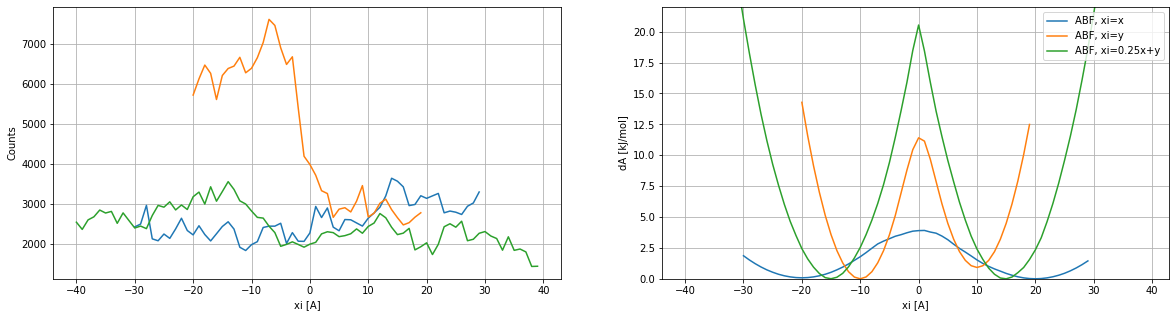

In [43]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
#ax1.plot(x3,hist3x, label='Reference x')
#ax1.plot(y3,hist3y, label='Reference y')
ax1.plot(abf3x_out['Xi'],abf3x_out['Count'],label='ABF, xi=x')
ax1.plot(abf3y_out['Xi'],abf3y_out['Count'],label='ABF, xi=y')
#ax1.plot(abf3xy_out['Xi'],abf3xy_out['Count'],label='ABF, xi=x+y')
ax1.plot(abf3x4y_out['Xi'],abf3x4y_out['Count'],label='ABF, xi=0.25x+y')

#ax2.plot(x3,free_E3x, label='Reference x')
#ax2.plot(y3,free_E3y, label='Reference y')
#ax2.plot(xy3,free_E3xy, label='Reference x+y')
ax2.plot(abf3x_out['Xi'],abf3x_out['dA'],label='ABF, xi=x')
ax2.plot(abf3y_out['Xi'],abf3y_out['dA'],label='ABF, xi=y')
#ax2.plot(abf3xy_out['Xi'],abf3xy_out['dA'],label='ABF, xi=x+y')
ax2.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF, xi=0.25x+y')

ax1.set_xlabel('xi [A]')
ax1.set_ylabel('Counts')
ax1.grid()
ax2.set_xlabel('xi [A]')
ax2.set_ylabel('dA [kJ/mol]')
ax2.grid()
ax2.set_ylim([0,22])
plt.legend()

In [44]:
eabf3x4y_out1 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out1 = pd.read_csv('p3_eabfx4y_sig1p0_out.txt',sep='\t')
eabf3x4y_out1.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj1 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj1 = pd.read_csv('p3_eabfx4y_sig1p0_traj.dat',sep='\t')
eabf3x4y_traj1.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out1 = ABF_estimator(eabf3x4y_out1)
cA3x4y1 = CZAR_estimator(eabf3x4y_traj1, -50, 50, 2.0, 1.0, 550.0)


	k =	      0.001742 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



In [45]:
eabf3x4y_out2 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out2= pd.read_csv('p3_eabfx4y_sig2p0_out.txt',sep='\t')
eabf3x4y_out2.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj2 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj2 = pd.read_csv('p3_eabfx4y_sig2p0_traj.dat',sep='\t')
eabf3x4y_traj2.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out2 = ABF_estimator(eabf3x4y_out2)
cA3x4y2 = CZAR_estimator(eabf3x4y_traj2, -50, 50, 2.0, 2.0, 550.0)


	k =	      0.000435 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



In [46]:
eabf3x4y_out3 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out3 = pd.read_csv('p3_eabfx4y_sig3p0_out.txt',sep='\t')
eabf3x4y_out3.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj3 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj3 = pd.read_csv('p3_eabfx4y_sig3p0_traj.dat',sep='\t')
eabf3x4y_traj3.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out3 = ABF_estimator(eabf3x4y_out3)
cA3x4y3 = CZAR_estimator(eabf3x4y_traj3, -50, 50, 2.0, 3.0, 550.0)


	k =	      0.000194 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



In [47]:
eabf3x4y_out4 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out4 = pd.read_csv('p3_eabfx4y_sig4p0_out.txt',sep='\t')
eabf3x4y_out4.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj4 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj4 = pd.read_csv('p3_eabfx4y_sig4p0_traj.dat',sep='\t')
eabf3x4y_traj4.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out4 = ABF_estimator(eabf3x4y_out4)
cA3x4y4 = CZAR_estimator(eabf3x4y_traj4, -50, 50, 2.0, 4.0, 550.0)


	k =	      0.000109 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



In [48]:
eabf3x4y_out5 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out5 = pd.read_csv('p3_eabfx4y_tau10000_out.txt',sep='\t')
eabf3x4y_out5.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj5 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj5 = pd.read_csv('p3_eabfx4y_tau10000_traj.dat',sep='\t')
eabf3x4y_traj5.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out5 = ABF_estimator(eabf3x4y_out5)
cA3x4y5 = CZAR_estimator(eabf3x4y_traj5, -50, 50, 2.0, 2.0, 550.0)


	k =	      0.000435 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



In [49]:
eabf3x4y_out6 = pd.DataFrame(dtype=np.float64)
eabf3x4y_out6 = pd.read_csv('p3_eabfx4y_tau100000_out.txt',sep='\t')
eabf3x4y_out6.columns = ['Bin','Xi','Count','Sum Forces','Mean Force']
eabf3x4y_traj6 = pd.DataFrame(dtype=np.float64)
eabf3x4y_traj6 = pd.read_csv('p3_eabfx4y_tau100000_traj.dat',sep='\t')
eabf3x4y_traj6.columns = ['time','Xi0','eXi0','- ']
eabf3x4y_out6 = ABF_estimator(eabf3x4y_out6)
cA3x4y6 = CZAR_estimator(eabf3x4y_traj6, -50, 50, 2.0, 2.0, 550.0)


	k =	      0.000435 Hartree/rad^2
	dx =	      2.000000
	minx =	    -50.000000
	maxx =	     50.000000
	nbins =	            50



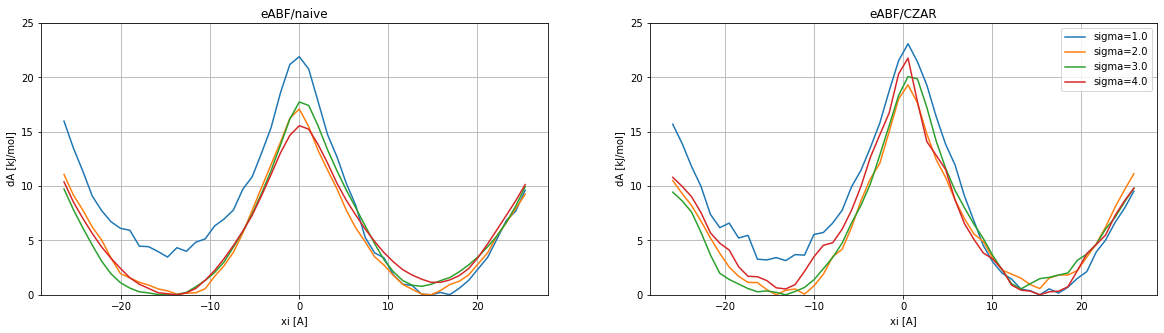

In [50]:
fig, (ax2,ax3) = plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('eABF/CZAR')
#ax3.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF')
ax3.plot(cA3x4y1[0]*bohr2angs,cA3x4y1[1],label='sigma=1.0')
ax3.plot(cA3x4y1[0]*bohr2angs,cA3x4y2[1],label='sigma=2.0')
ax3.plot(cA3x4y1[0]*bohr2angs,cA3x4y3[1],label='sigma=3.0')
ax3.plot(cA3x4y1[0]*bohr2angs,cA3x4y4[1],label='sigma=4.0')

ax2.set_title('eABF/naive')
#ax2.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF')
ax2.plot(eabf3x4y_out1['Xi']*bohr2angs,eabf3x4y_out1['dA']*bohr2angs,label='sigma=1.0')
ax2.plot(eabf3x4y_out2['Xi']*bohr2angs,eabf3x4y_out2['dA']*bohr2angs,label='sigma=2.0')
ax2.plot(eabf3x4y_out3['Xi']*bohr2angs,eabf3x4y_out3['dA']*bohr2angs,label='sigma=3.0')
ax2.plot(eabf3x4y_out4['Xi']*bohr2angs,eabf3x4y_out4['dA']*bohr2angs,label='sigma=4.0')


#ax1.set_xlabel('xi [A]')
#ax1.set_ylabel('Counts')
#ax1.grid()
ax2.set_xlabel('xi [A]')
ax2.set_ylabel('dA [kJ/mol]')
ax2.grid()
ax3.set_ylim([0,25])
ax2.set_ylim([0,25])
ax3.set_xlabel('xi [A]')
ax3.set_ylabel('dA [kJ/mol]')
ax3.grid()
#ax3.set_ylim([0,30])
plt.legend()

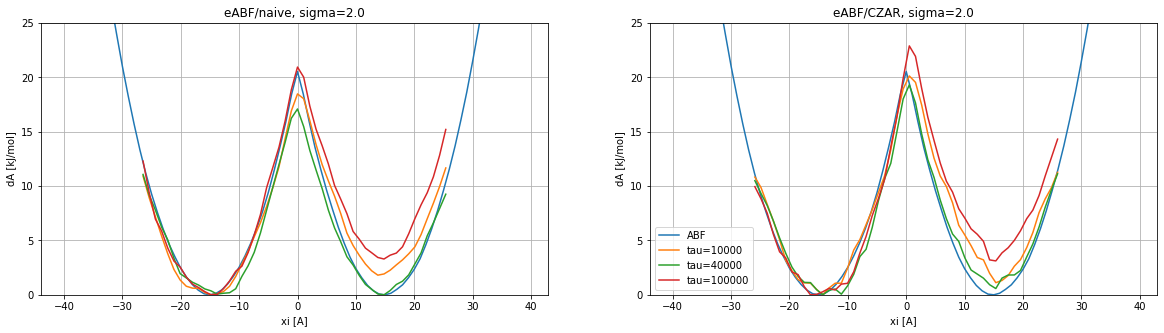

In [51]:
fig, (ax2,ax3) = plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('eABF/CZAR, sigma=2.0')
ax3.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF')
ax3.plot(cA3x4y5[0]*bohr2angs,cA3x4y5[1],label='tau=10000')
ax3.plot(cA3x4y2[0]*bohr2angs,cA3x4y2[1],label='tau=40000')
ax3.plot(cA3x4y6[0]*bohr2angs,cA3x4y6[1],label='tau=100000')

ax2.set_title('eABF/naive, sigma=2.0')
ax2.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF')
ax2.plot(eabf3x4y_out5['Xi']*bohr2angs,eabf3x4y_out5['dA']*bohr2angs,label='tau=10000')
ax2.plot(eabf3x4y_out2['Xi']*bohr2angs,eabf3x4y_out2['dA']*bohr2angs,label='tau=40000')
ax2.plot(eabf3x4y_out6['Xi']*bohr2angs,eabf3x4y_out6['dA']*bohr2angs,label='tau=100000')

ax2.set_xlabel('xi [A]')
ax2.set_ylabel('dA [kJ/mol]')
ax2.grid()
ax3.set_ylim([0,25])
ax2.set_ylim([0,25])
ax3.set_xlabel('xi [A]')
ax3.set_ylabel('dA [kJ/mol]')
ax3.grid()
plt.legend()

In [52]:
minx    = -50.0
maxx    = 50.0
dx      = 2.0
hist_x1  = [0 for i in range(len(eabf3x4y_out1))]
hist_x2 = [0 for i in range(len(eabf3x4y_out2))]
hist_x3 = [0 for i in range(len(eabf3x4y_out3))]
hist_x4 = [0 for i in range(len(eabf3x4y_out4))]

for i in range(len(eabf3x4y_out1)):
    hist_x1[i] = len(eabf3x4y_traj1[eabf3x4y_traj1.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    hist_x2[i] = len(eabf3x4y_traj2[eabf3x4y_traj2.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    hist_x3[i] = len(eabf3x4y_traj3[eabf3x4y_traj3.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    hist_x4[i] = len(eabf3x4y_traj4[eabf3x4y_traj4.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])


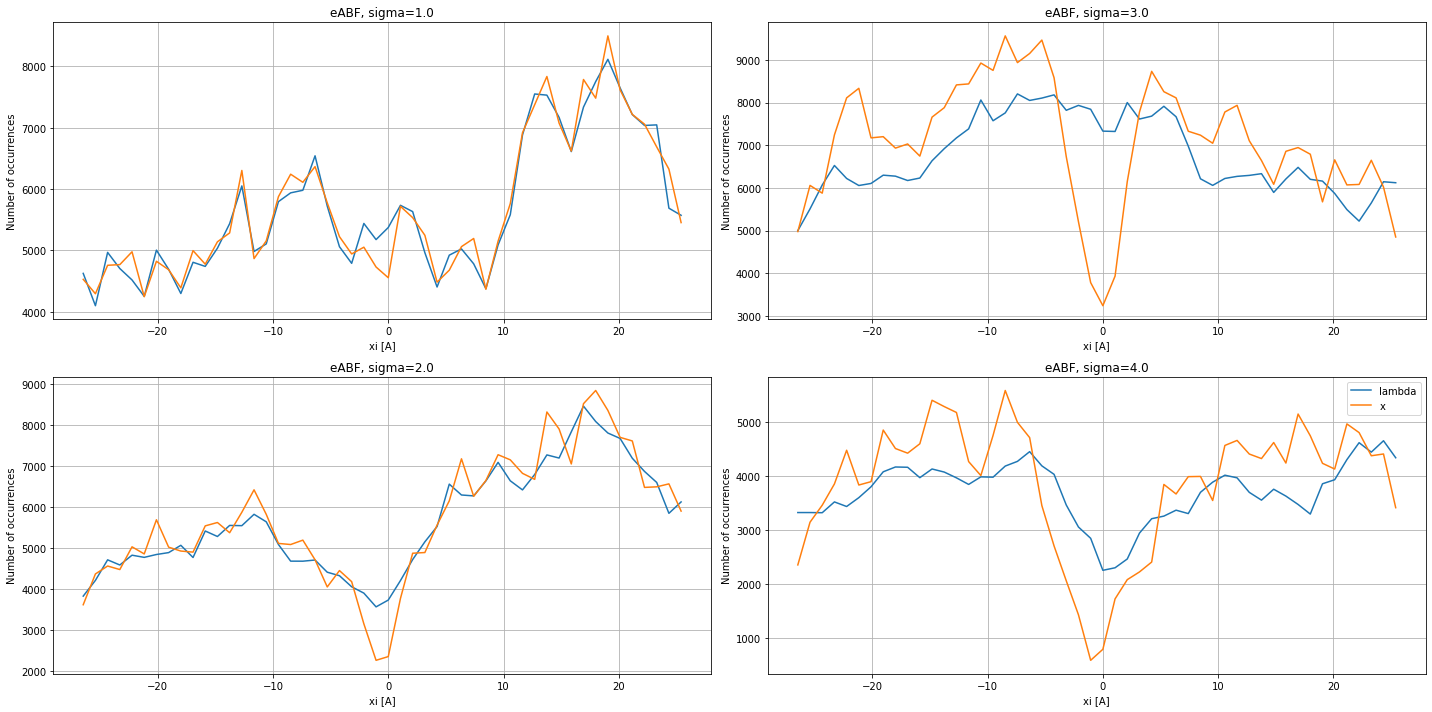

In [53]:
fig, axs = plt.subplots(2, 2,figsize=(20,10))

axs[0,0].set_title('eABF, sigma=1.0')
#axs[0,0].plot(abf3x4y_out['Xi'],abf3x4y_out['Count'],'C0',label='ABF')
axs[0,0].plot(eabf3x4y_out1['Xi']*bohr2angs,eabf3x4y_out1['Count'],label='lambda')
axs[0,0].plot(eabf3x4y_out1['Xi']*bohr2angs,hist_x1,label='x')
axs[1,0].set_title('eABF, sigma=2.0')
axs[1,0].plot(eabf3x4y_out2['Xi']*bohr2angs,eabf3x4y_out2['Count'],label='lambda')
axs[1,0].plot(eabf3x4y_out2['Xi']*bohr2angs,hist_x2,label='x')
axs[0,1].set_title('eABF, sigma=3.0')
axs[0,1].plot(eabf3x4y_out3['Xi']*bohr2angs,eabf3x4y_out3['Count'],label='lambda')
axs[0,1].plot(eabf3x4y_out3['Xi']*bohr2angs,hist_x3,label='x')
axs[1,1].set_title('eABF, sigma=4.0')
axs[1,1].plot(eabf3x4y_out4['Xi']*bohr2angs,eabf3x4y_out4['Count'],label='lambda')
axs[1,1].plot(eabf3x4y_out4['Xi']*bohr2angs,hist_x4,label='x')

axs[0,0].set_xlabel('xi [A]')
axs[0,0].set_ylabel('Number of occurrences')
axs[1,0].set_xlabel('xi [A]')
axs[1,0].set_ylabel('Number of occurrences')
axs[0,1].set_xlabel('xi [A]')
axs[0,1].set_ylabel('Number of occurrences')
axs[1,1].set_xlabel('xi [A]')
axs[1,1].set_ylabel('Number of occurrences')

axs[0,0].grid()
axs[1,0].grid()
axs[0,1].grid()
axs[1,1].grid()

plt.tight_layout()
plt.legend()

In [54]:
t1 = pd.DataFrame(dtype=np.float64)
t1 = pd.read_csv('abf_traj_5000.dat',sep='\t')
t1.columns = ['time','Xi0','eXi0','- ']
t2 = pd.DataFrame(dtype=np.float64)
t2 = pd.read_csv('abf_traj_10000.dat',sep='\t')
t2.columns = ['time','Xi0','eXi0','- ']
t3 = pd.DataFrame(dtype=np.float64)
t3 = pd.read_csv('abf_traj_15000.dat',sep='\t')
t3.columns = ['time','Xi0','eXi0','- ']
t4 = pd.DataFrame(dtype=np.float64)
t4 = pd.read_csv('abf_traj_20000.dat',sep='\t')
t4.columns = ['time','Xi0','eXi0','- ']

In [55]:
minx    = -50.0
maxx    = 50.0
dx      = 2.0
x1  = [0 for i in range(len(eabf3x4y_out1))]
x2 = [0 for i in range(len(eabf3x4y_out2))]
x3 = [0 for i in range(len(eabf3x4y_out3))]
x4 = [0 for i in range(len(eabf3x4y_out4))]
la1  = [0 for i in range(len(eabf3x4y_out1))]
la2 = [0 for i in range(len(eabf3x4y_out2))]
la3 = [0 for i in range(len(eabf3x4y_out3))]
la4 = [0 for i in range(len(eabf3x4y_out4))]
dxi = [0 for i in range(len(eabf3x4y_out4))]
for i in range(len(eabf3x4y_out1)):
    dxi[i] = minx+i*dx+dx/2
    x1[i] = len(t1[t1.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    x2[i] = len(t2[t2.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    x3[i] = len(t3[t3.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    x4[i] = len(t4[t4.iloc[:,1].between(minx+i*dx,minx+i*dx+dx)])
    la1[i] = len(t1[t1.iloc[:,2].between(minx+i*dx,minx+i*dx+dx)])
    la2[i] = len(t2[t2.iloc[:,2].between(minx+i*dx,minx+i*dx+dx)])
    la3[i] = len(t3[t3.iloc[:,2].between(minx+i*dx,minx+i*dx+dx)])
    la4[i] = len(t4[t4.iloc[:,2].between(minx+i*dx,minx+i*dx+dx)])

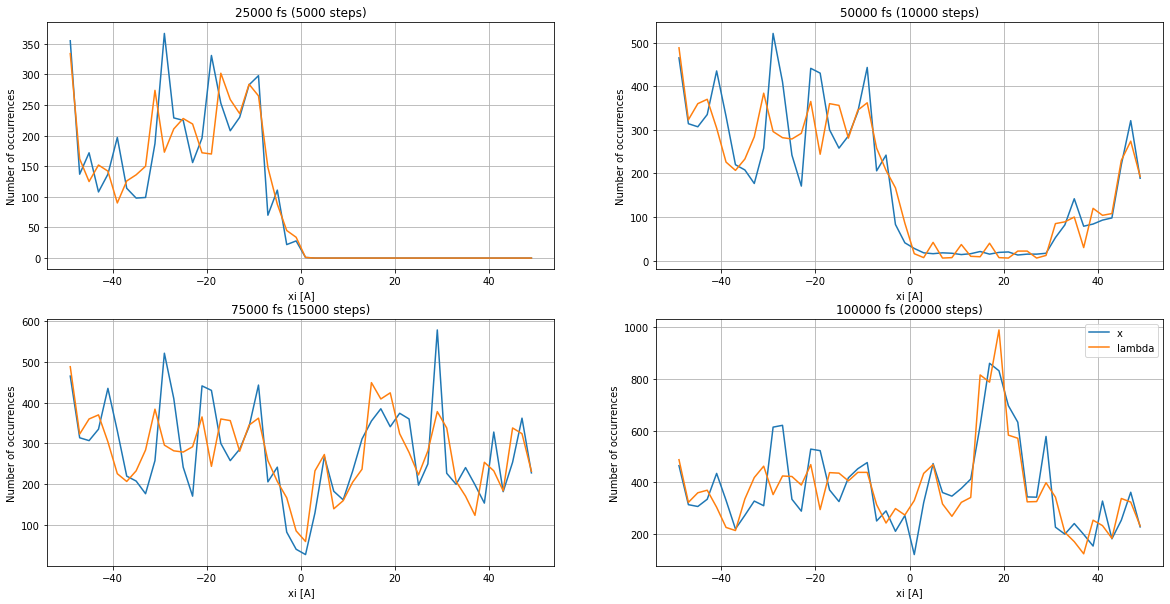

In [56]:
fig, axs = plt.subplots(2, 2,figsize=(20,10))

axs[0,0].set_title('25000 fs (5000 steps)')
axs[0,0].plot(dxi, x1, label='x')
axs[0,0].plot(dxi, la1, label='lambda')
axs[0,1].set_title('50000 fs (10000 steps)')
axs[0,1].plot(dxi, x2, label='x')
axs[0,1].plot(dxi, la2, label='lambda')
axs[1,0].set_title('75000 fs (15000 steps)')
axs[1,0].plot(dxi, x3, label='x')
axs[1,0].plot(dxi, la3, label='lambda')
axs[1,1].set_title('100000 fs (20000 steps)')
axs[1,1].plot(dxi, x4, label='x')
axs[1,1].plot(dxi, la4, label='lambda')

axs[0,0].set_xlabel('xi [A]')
axs[0,0].set_ylabel('Number of occurrences')
axs[1,0].set_xlabel('xi [A]')
axs[1,0].set_ylabel('Number of occurrences')
axs[0,1].set_xlabel('xi [A]')
axs[0,1].set_ylabel('Number of occurrences')
axs[1,1].set_xlabel('xi [A]')
axs[1,1].set_ylabel('Number of occurrences')

axs[0,0].grid()
axs[1,0].grid()
axs[0,1].grid()
axs[1,1].grid()
plt.legend()

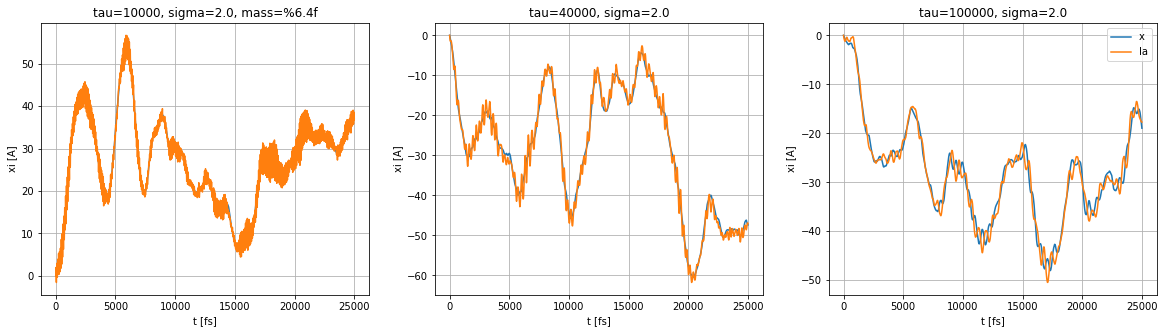

In [57]:
fig, axs = plt.subplots(1, 3,figsize=(20,5))

axs[0].set_title(f'tau=10000, sigma=2.0, mass=%6.4f' )
axs[0].plot(eabf3x4y_traj5['time'][0:5000], eabf3x4y_traj5['Xi0'][0:5000], label='x')
axs[0].plot(eabf3x4y_traj5['time'][0:5000], eabf3x4y_traj5['eXi0'][0:5000], label='lambda')
axs[1].set_title('tau=40000, sigma=2.0')
axs[1].plot(t1['time'], t1['Xi0'], label='x')
axs[1].plot(t1['time'], t1['eXi0'], label='lambda')
axs[2].set_title('tau=100000, sigma=2.0')
axs[2].plot(eabf3x4y_traj6['time'][0:5000], eabf3x4y_traj6['Xi0'][0:5000], label='x')
axs[2].plot(eabf3x4y_traj6['time'][0:5000], eabf3x4y_traj6['eXi0'][0:5000], label='la')

axs[0].set_xlabel('t [fs]')
axs[0].set_ylabel('xi [A]')
axs[1].set_xlabel('t [fs]')
axs[1].set_ylabel('xi [A]')
axs[2].set_xlabel('t [fs]')
axs[2].set_ylabel('xi [A]')

axs[0].grid()
axs[1].grid()
axs[2].grid()

plt.legend()

In [58]:
t = pd.DataFrame(dtype=np.float64)
t = pd.read_csv('abf_traj.dat',sep='\t')
t.columns = ['time','Xi0','eXi0','- ']
plt.plot(t['time'],t['Xi0'])
plt.plot(t['time'],t['eXi0'])
plt.grid()
plt.xlabel('t [fs]')
plt.ylabel('xi [A]')

FileNotFoundError: [Errno 2] No such file or directory: 'abf_traj.dat'

In [ ]:
t['test'] = (t['Xi0']-t['eXi0'])
minx    = t['test'].min()
maxx    = t['test'].max()
dx      = (maxx-minx)/100
hist_diff  = [0 for i in range(100)]
d = [0 for i in range(100)]
for i in range(100):
    d[i] = minx+i*dx+dx/2
    hist_diff[i] = len(t[t.iloc[:,4].between(minx+i*dx,minx+i*dx+dx)])
   
plt.plot(d,hist_diff)
plt.xlabel('z-lambda [Bohr]')
plt.ylabel('Number of occurences')
plt.grid()

In [ ]:
mass1 = kB_a * H_to_u * 550 * ((10000*fs_to_au)/(2*np.pi*2.0)) * ((10000*fs_to_au)/(2*np.pi*2.0))
mass2 = kB_a * H_to_u * 550 * ((40000*fs_to_au)/(2*np.pi*2.0)) * ((40000*fs_to_au)/(2*np.pi*2.0))
mass3 = kB_a * H_to_u * 550 * ((100000*fs_to_au)/(2*np.pi*2.0)) * ((100000*fs_to_au)/(2*np.pi*2.0))

In [ ]:
0.0044 * H_in_kJmol * bohr2angs

In [ ]:
plt.plot(eabf3x4y_out['Xi']*bohr2angs,dA,label='ABF, xi=0.25x+y')

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))
levels = np.linspace(0,15,10)
cs = plt.contourf(X1,Y1,dA,levels=levels)
fig.colorbar(cs)

In [ ]:
x2 = np.linspace(-30, 27, 20)
y2 = np.linspace(-5.0, 4.0, 10)
dx = 3.0
dy = 1.0
X2, Y2 = np.meshgrid(x2,y2)
F2 = np.copy(X2) * 0.0
for i in range(0,len(x2)*len(y2),len(y2)):
    F2[:,int(i/len(y1))] = abf2_2D_out.iloc[i:i+len(y2),6] #+ abf2_2D_out.iloc[i:i+len(y2),7]
#F2[F2==0] = F2.max()
dA2 = ABF2D_integrator(F2,dx,dy)

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))
levels = np.linspace(0,15,10)
cs = plt.contourf(X2,Y2,dA2,levels=levels)
fig.colorbar(cs)

In [ ]:
ats = [[0,1,2,3],[4,5,6,7]]

In [ ]:
[item[0] for item in ats]

In [358]:
metaD_traj = pd.read_csv('metaD_test.txt', sep='\t')
metaD_traj.columns = ['time', 'X', 'Y', 'epot', 'ekin', 'etot', 'T']

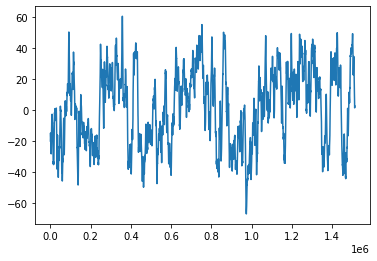

In [359]:
plt.plot(metaD_traj['time'],metaD_traj['X'])

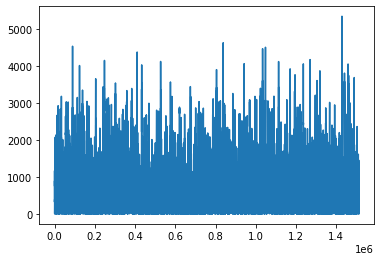

In [360]:
plt.plot(metaD_traj['time'],metaD_traj['T'])

In [361]:
metaD_out = pd.DataFrame(dtype=np.float64)
metaD_out = pd.read_csv('metaD_var2.0_height0.08_tau20_out.txt',sep='\t')
metaD_out.columns = ['Bin','Xi','Bias Pot', 'Bias Force']
metaD_out['dA'] = -metaD_out['Bias Pot']*H_in_kJmol
metaD_out['dA'] -= metaD_out['dA'].min()

In [364]:
WTmetaD_out = pd.DataFrame(dtype=np.float64)
WTmetaD_out = pd.read_csv('out_metaD.txt',sep='\t')
WTmetaD_out.columns = ['Bin','Xi','Bias Pot', 'Bias Force']
WTmetaD_out['dA'] = -((550+5000)/(5000))*WTmetaD_out['Bias Pot']*H_in_kJmol
WTmetaD_out['dA'] -= WTmetaD_out['dA'].min()

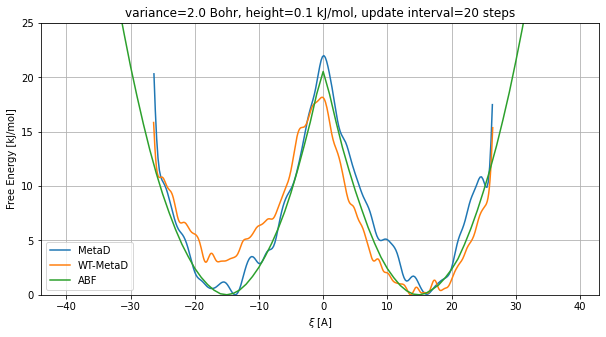

In [365]:
fig, axs = plt.subplots(figsize=(10,5))
#axs[0].plot(metaD_out['Xi']*bohr2angs,metaD_out['Bias Pot']*H_in_kJmol,label='MetaD')
#axs[0].plot(WTmetaD_out['Xi']*bohr2angs,WTmetaD_out['Bias Pot']*H_in_kJmol,label='WT-MetaD')

axs.plot(metaD_out['Xi']*bohr2angs,metaD_out['dA'],label='MetaD')
axs.plot(WTmetaD_out['Xi']*bohr2angs,WTmetaD_out['dA'],label='WT-MetaD')
axs.plot(abf3x4y_out['Xi'],abf3x4y_out['dA'],label='ABF')

plt.title('variance=2.0 Bohr, height=0.1 kJ/mol, update interval=20 steps')
plt.grid()
plt.ylim([0,25])
plt.xlabel('$\\xi$ [A]')
plt.ylabel('Free Energy [kJ/mol]')
plt.legend()

In [135]:
metaD_out

,Bin,Xi,Bias Pot,Bias Force,dA
0,0,-49.8,0.008527,0.003483,20.323993
1,1,-49.4,0.009804,0.002863,16.971230
2,2,-49.0,0.010798,0.002100,14.361483
3,3,-48.6,0.011487,0.001360,12.552514
4,4,-48.2,0.011907,0.000773,11.449804
...,...,...,...,...,...
245,245,48.2,0.012503,-0.000163,9.885006
246,246,48.6,0.012307,-0.000861,10.399604
247,247,49.0,0.011784,-0.001775,11.772740
248,248,49.4,0.010879,-0.002746,14.148818


\begin{equation}
V({s},t)= \sum_{t'=0,\tau_G,2\tau_G,\dots}^{t'<t} W e^{-V({s}({q}(t'),t')/\Delta T} \exp\left(
-\sum_{i=1}^{d} \frac{(s_i({q})-s_i({q}(t'))^2}{2\sigma_i^2}
\right),
\end{equation}

In [ ]:
dx = np.array([[i for i in range(10)]])

In [ ]:
dx.T

In [ ]:
dx.T*dx.T

In [ ]:
(dx.T*dx).T

In [ ]:
20/(550+20)